1.Analysing the relation between a new drug dosage and patient’s blood pressure reduction. U hav data on dosage, patient_age, weight and baseline blood pressure
a)how do u set up a linear regression model for this analysis
b)how do u investigate if there is an interaction effect between dosage and age on bp reduction
c)when u identify patient with extreme bp reduction values, how do u handle these outliers


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Creating a DataFrame with the provided data
data = {
    'dosage': [100, 120, 80, 90, 110, 130, 140, 100, 110, 120,
               130, 90, 100, 110, 120, 130, 140, 150, 80, 95],  # Dosage in mg
    'patient_age': [45, 50, 55, 60, 65, 70, 50, 55, 60, 65,
                    70, 75, 45, 50, 55, 60, 65, 70, 75, 45],  # Age in years
    'weight': [70, 75, 80, 85, 90, 95, 75, 80, 85, 90,
               95, 100, 70, 75, 80, 85, 90, 95, 100, 70],  # Weight in kg
    'baseline_bp': [120, 130, 140, 120, 130, 140, 120, 130, 140, 120,
                     130, 140, 120, 130, 140, 120, 130, 140, 120, 130],  # Baseline blood pressure in mmHg
    'bp_reduction': [8, 10, 5, 7, 9, 12, 13, 9, 10, 11,
                     12, 7, 8, 9, 10, 11, 13, 14, 6, 8]  # Blood pressure reduction in mmHg
}

df = pd.DataFrame(data)

# Setting up linear regression model
X = df[['dosage', 'patient_age', 'weight', 'baseline_bp']]
y = df['bp_reduction']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X_test)
# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.1178179   0.0055039   0.0055039  -0.00530287]
Intercept: -3.7281461285551707


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Compute Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Compute R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)
# Evaluate the model with interaction term
mse_interact = mean_squared_error(y_test_interact, y_pred_interact)
print("Mean Squared Error (with Interaction):", mse_interact)

Mean Absolute Error: 0.6888002505219356
Root Mean Squared Error: 0.8981418060149782
R-squared: 0.7109938947664847
Mean Squared Error (with Interaction): 2.4037133014776675


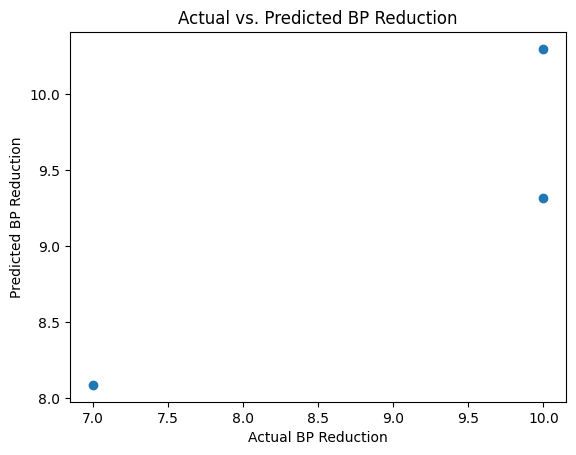

In [12]:
# Visualize actual vs. predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual BP Reduction")
plt.ylabel("Predicted BP Reduction")
plt.title("Actual vs. Predicted BP Reduction")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

# Adding interaction term
df['dosage_age_interaction'] = df['dosage'] * df['patient_age']

# Split data into training and testing sets
X_interact = df[['dosage', 'patient_age', 'weight', 'baseline_bp', 'dosage_age_interaction']]
X_train_interact, X_test_interact, y_train_interact, y_test_interact = train_test_split(X_interact, y, test_size=0.2, random_state=42)

# Fit the linear regression model with interaction term
model_interact = LinearRegression()
model_interact.fit(X_train_interact, y_train_interact)

# Make predictions
y_pred_interact = model_interact.predict(X_test_interact)
print(y_pred)
print("Coefficients with interaction term:", model_interact.coef_)



[ 9.31689037 10.29753219  8.08575893]
Coefficients with interaction term: [ 0.1017085  -0.01208915 -0.01208915 -0.01411641  0.00032553]


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

# Assuming 'data' is your existing dataset
data=pd.DataFrame(data)
# Detect outliers using Z-score
z_scores = np.abs(stats.zscore(data['bp_reduction']))
threshold = 3
outliers_indices = np.where(z_scores > threshold)[0]

# Remove outliers
cleaned_data = data.drop(outliers_indices)

# Re-run the analysis with cleaned data

# Setting up linear regression model with cleaned data
X_cleaned = cleaned_data[['dosage', 'patient_age', 'weight', 'baseline_bp']]
y_cleaned = cleaned_data['bp_reduction']
model_cleaned = LinearRegression()
model_cleaned.fit(X_cleaned, y_cleaned)

# Print coefficients
print("Coefficients after removing outliers:", model_cleaned.coef_)
print("Intercept after removing outliers:", model_cleaned.intercept_)


Coefficients after removing outliers: [ 0.1178179   0.0055039   0.0055039  -0.00530287]
Intercept after removing outliers: -3.7281461285551707


Gaussian model(naive bayes)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Sample dataset
data = {
    'dosage': [100, 120, 80, 90, 110, 130, 140, 100, 110, 120,
               130, 90, 100, 110, 120, 130, 140, 150, 80, 95],  # Dosage in mg
    'patient_age': [45, 50, 55, 60, 65, 70, 50, 55, 60, 65,
                    70, 75, 45, 50, 55, 60, 65, 70, 75, 45],  # Age in years
    'weight': [70, 75, 80, 85, 90, 95, 75, 80, 85, 90,
               95, 100, 70, 75, 80, 85, 90, 95, 100, 70],  # Weight in kg
    'baseline_bp': [120, 130, 140, 120, 130, 140, 120, 130, 140, 120,
                     130, 140, 120, 130, 140, 120, 130, 140, 120, 130],  # Baseline blood pressure in mmHg
    'bp_reduction': [8, 10, 5, 7, 9, 12, 13, 9, 10, 11,
                     12, 7, 8, 9, 10, 11, 13, 14, 6, 8]  # Blood pressure reduction in mmHg
}

# Create DataFrame
df = pd.DataFrame(data)

# Define classes for blood pressure reduction
def categorize_bp_reduction(bp_reduction):
    if bp_reduction <= 5:
        return 'low'
    elif bp_reduction <= 10:
        return 'medium'
    else:
        return 'high'

# Create a new column for blood pressure reduction classes
df['bp_reduction_class'] = df['bp_reduction'].apply(categorize_bp_reduction)

# Separate features and target variable
X = df[['dosage', 'patient_age', 'weight', 'baseline_bp']]
y = df['bp_reduction_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [20]:
from sklearn.preprocessing import PolynomialFeatures

# Adding interaction term
interaction = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_interaction = interaction.fit_transform(X)

# Splitting the data into training and testing sets
X_train_interaction, X_test_interaction, y_train_interaction, y_test_interaction = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier with interaction terms
nb_classifier_interaction = GaussianNB()

# Train the classifier
nb_classifier_interaction.fit(X_train_interaction, y_train_interaction)

# Predict on the testing set
y_pred_interaction = nb_classifier_interaction.predict(X_test_interaction)

# Calculate accuracy
accuracy_interaction = accuracy_score(y_test_interaction, y_pred_interaction)
print("Accuracy with interaction terms:", accuracy_interaction)


Accuracy with interaction terms: 1.0


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[2 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00         2
      medium       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [22]:
z_scores = stats.zscore(df['bp_reduction'])
threshold = 3
outliers_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove outliers
cleaned_df = df.drop(outliers_indices)
# Re-run the analysis with cleaned data
X_cleaned = cleaned_df[['dosage', 'patient_age', 'weight', 'baseline_bp']]
y_cleaned = cleaned_df['bp_reduction_class']

# Split the cleaned data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier with cleaned data
nb_classifier_cleaned = GaussianNB()

# Train the classifier with cleaned data
nb_classifier_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Predict on the testing set with cleaned data
y_pred_cleaned = nb_classifier_cleaned.predict(X_test_cleaned)

# Calculate accuracy with cleaned data
accuracy_cleaned = accuracy_score(y_test_cleaned, y_pred_cleaned)
print("Accuracy with cleaned data:", accuracy_cleaned)


Accuracy with cleaned data: 1.0
